# Графовые алгоритмы

Граф - это структура, которая отображает данные в виде *вершин* и *ребер*. Граф может быть представлени в виде **aGraph = (V, E)** , где **V** - набор вершин, а **E** - ребро между ними. Ребро соединяет две вершины и таким образом отображает связь между ними.

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import time

## Поиск в ширину

Алгоритм **BFS (breadth-first search)** начинает с корневой вершины и исследует вершины в окрестности. Затем он преходит на следующий уровень окрестности и повторяет процесс.

In [11]:
def bfs(graph, start):
    visited = []
    queue = [start]

    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            neighbours = graph[node]
            for neighbour in neighbours:
                queue.append(neighbour)
    return visited

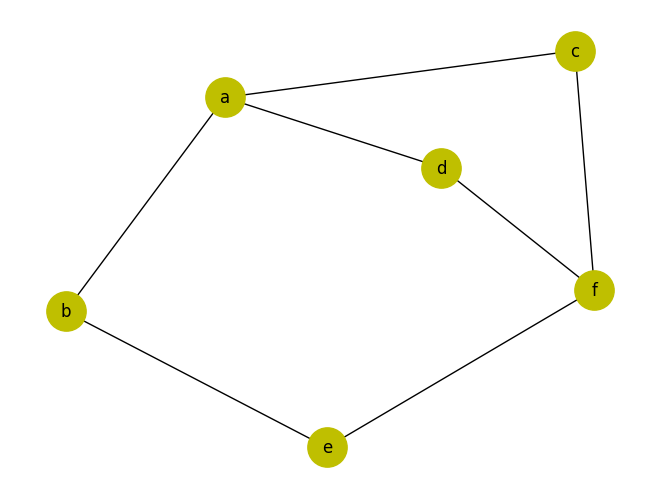

In [9]:
vertices = ('a', 'b', 'c', 'd', 'e', 'f')
edges = [('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'e'), ('b', 'a'),
         ('e', 'b'), ('e', 'f'), ('f', 'e'), ('c', 'f'), ('f', 'd')]

G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)

nx.draw(G,
        pos=nx.spring_layout(G),
        with_labels=True,
        node_color='y',
        node_size=800)

In [12]:
bfs(G, 'a')

['a', 'b', 'c', 'd', 'e', 'f']

## Поиск в глубину

Алгоритм **DFS (depth-first search)** - это альтернатива BFS, используемая для поиска данных в графе. DFS отличается от BFS тем, что после запуска из корневой вершины алгоритм проходит как можно дальше по каждому из уникальных путей, перебирая их одина за другим.

Логика алгоритма следующая:

- Как только он успешно достигает конечной глубины каждого пути, он помечает флагом все вершины на этом пути как посещенные. После завершения пути алгоритм возвращается назад.
- Если он может найти еще один уникальный путь от корневого узла, процесс повторяется.
- Алгоритм продолжает двигаться по новым ветвям до тех пор, пока все ветви не будут посещены.

In [633]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start)
    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited

In [634]:
graph = {'a': set(['b','c','d']),
         'b': set(['e','a']),
         'c': set(['a']),
         'd': set(['a']),
         'e': set(['b','f']),
         'f': set(['e']),
         }

dfs(graph, start='a')

a
d
c
b
e
f


{'a', 'b', 'c', 'd', 'e', 'f'}

## Задание (2 балла) + 4 б

Создать и нарисовать произвольный граф двумя описанными выше способами, и реальзовать для него алгоритмы BFS и DFS

bfs:
 time:  0.034332275390625 
 result:  [0, 1, 3, 4, 6, 7, 8, 9, 2, 5] 
bfs_my:
 time:  0.014781951904296875 
 result:  [0, 1, 3, 4, 6, 7, 8, 9, 2, 5] 
time difference:  0.019550323486328125 
Are the results identical?  True


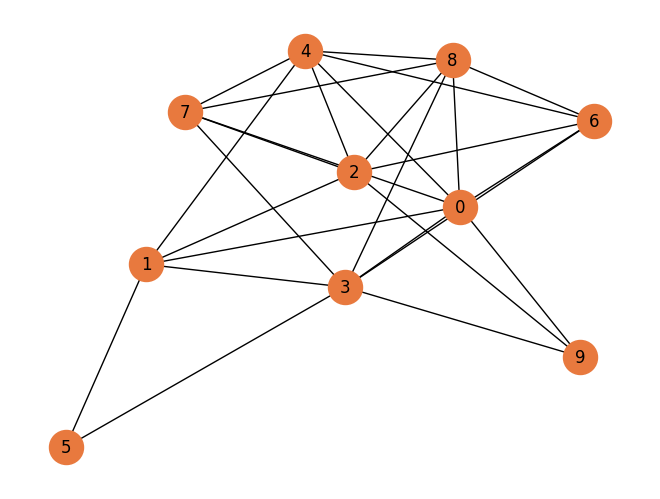

In [632]:
#решение
def benchmark(func):
    def wrapper(*args):
        start = time.time()
        return_value = func(*args)
        end = time.time()
        return (end-start)*1000, return_value
    return wrapper

def show(result, result_my):
    print('bfs:\n', 'time: ', result[0], '\n result: ', result[1],
      '\nbfs_my:\n', 'time: ', result_my[0], '\n result: ', result_my[1],
      '\ntime difference: ', result[0] - result_my[0],
      '\nAre the results identical? ', result[1] == result_my[1])

def bfs_my(graph, start):
    visited = [start]
    queue = [start]

    while queue:
        node = queue.pop(0)
        for neighbour in graph[node]:
            if neighbour not in visited:
                queue.append(neighbour)
                visited.append(neighbour)

    return visited

def bfs(graph, start):
    visited = []
    queue = [start]

    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            neighbours = graph[node]
            for neighbour in neighbours:
                queue.append(neighbour)
    return visited

graph = nx.erdos_renyi_graph(10, 0.6)
nx.draw(graph,
        pos=nx.spring_layout(graph),
        with_labels=True,
        node_color='#e8793e',
        node_size=600)

result = benchmark(bfs)
result_my = benchmark(bfs_my)

show(result(graph, 0), result_my(graph, 0))